In [ ]:
from ipyleaflet import Map, SearchControl, Marker, AwesomeIcon
from ipywidgets import widgets, Layout
from IPython.display import display

univ_kara = (9.68803261638838, 1.1285112820273637)
m = Map(zoom=5, center=univ_kara, layout=Layout(width='250px', height='250px'))
marker = Marker(location=univ_kara, icon=AwesomeIcon(name="check", marker_color='green', icon_color='darkgreen'))
m.add_control(SearchControl(
  position="topleft",
  url='https://nominatim.openstreetmap.org/search?format=json&q={s}',
  zoom=5,
  marker=marker
))
m.add_layer(marker)

location = univ_kara
def handle_move(*args, **kwargs):
    global location
    location = marker.location
    
def close_map(*args, **kwargs):
    # global m
    box.layout = Layout(width='0px', height='0px')
    m.close()
    close_but.close()

marker.on_move(handle_move)

close_but = widgets.Button(icon='close', layout=Layout(width='40px', height='40px'))
close_but.on_click(close_map)

box = widgets.Box([m, close_but], layout=Layout(width='250px', height='250px'))

print(marker.location)

display(box)

[9.68803261638838, 1.1285112820273637]


Box(children=(Map(center=[9.68803261638838, 1.1285112820273637], controls=(ZoomControl(options=['position', 'z…

In [25]:
date = widgets.DatePicker(description = 'Start Date')
display(date)

DatePicker(value=None, description='Start Date')

In [29]:
print(date.value)
a = str(date.value)
type(a)
print(a)

2022-04-23
2022-04-23


In [ ]:
import requests
import json

end_point = "https://power.larc.nasa.gov/api/temporal/monthly/point"
fmt = "JSON"
community="RE"
param = "ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,WS2M,QV2M,RH2M"
start_year=2019
end_year=2020
latd = location[0]
lgtd = location[1]

load = {'parameters': param, 'community': community, 'longitude': lgtd, 'latitude': latd, 'format': fmt, 'start': start_year, 'end': end_year}

r = requests.get(end_point, params=load)
print(r.url)
print(r.status_code)

data = json.loads(r.text)

type(data)
# data['geometry']['coordinates']


In [ ]:
import numpy as np

# Load parameters
ALLSKY_SFC_SW_DWN = data['properties']['parameter']['ALLSKY_SFC_SW_DWN']
CLRSKY_SFC_SW_DWN = data['properties']['parameter']['CLRSKY_SFC_SW_DWN']
RH2M = data['properties']['parameter']['RH2M']
QV2M = data['properties']['parameter']['QV2M']
WS2M = data['properties']['parameter']['WS2M']
units = {'ALLSKY_SFC_SW_DWN':data['parameters']['ALLSKY_SFC_SW_DWN']['units'],
         'CLRSKY_SFC_SW_DWN':data['parameters']['CLRSKY_SFC_SW_DWN']['units'],
         'RH2M':data['parameters']['RH2M']['units'],
         'QV2M':data['parameters']['QV2M']['units'],
         'WS2M':data['parameters']['WS2M']['units']
         }

ALLSKY_SFC_SW_DWN = np.array([np.array([k, v]) for k, v in ALLSKY_SFC_SW_DWN.items()])
CLRSKY_SFC_SW_DWN = np.array([np.array([k, v]) for k, v in CLRSKY_SFC_SW_DWN.items()])
RH2M = np.array([np.array([k, v]) for k, v in RH2M.items()])
QV2M = np.array([np.array([k, v]) for k, v in QV2M.items()])
WS2M = np.array([np.array([k, v]) for k, v in WS2M.items()])

# slice years from months
All_Sky_Irradiance = np.zeros((ALLSKY_SFC_SW_DWN.shape[0], ALLSKY_SFC_SW_DWN.shape[1]+1))
Clear_Sky_Irradiance = np.zeros((CLRSKY_SFC_SW_DWN.shape[0], CLRSKY_SFC_SW_DWN.shape[1]+1))
Relative_Humidity = np.zeros((RH2M.shape[0], RH2M.shape[1]+1))
Specific_Humidity = np.zeros((QV2M.shape[0], QV2M.shape[1]+1))
Wind_Speed = np.zeros((WS2M.shape[0], WS2M.shape[1]+1))

All_Sky_Irradiance[:,0] = [i[0:4] for i in ALLSKY_SFC_SW_DWN[:,0]]
All_Sky_Irradiance[:,1] = [i[4:6] for i in ALLSKY_SFC_SW_DWN[:,0]]
All_Sky_Irradiance[:,2] = ALLSKY_SFC_SW_DWN[:,1]
Clear_Sky_Irradiance[:,0] = [i[0:4] for i in CLRSKY_SFC_SW_DWN[:,0]]
Clear_Sky_Irradiance[:,1] = [i[4:6] for i in CLRSKY_SFC_SW_DWN[:,0]]
Clear_Sky_Irradiance[:,2] = CLRSKY_SFC_SW_DWN[:,1]
Relative_Humidity[:,0] = [i[0:4] for i in RH2M[:,0]]
Relative_Humidity[:,1] = [i[4:6] for i in RH2M[:,0]]
Relative_Humidity[:,2] = RH2M[:,1]
Wind_Speed[:,0] = [i[0:4] for i in WS2M[:,0]]
Wind_Speed[:,1] = [i[4:6] for i in WS2M[:,0]]
Wind_Speed[:,2] = WS2M[:,1]


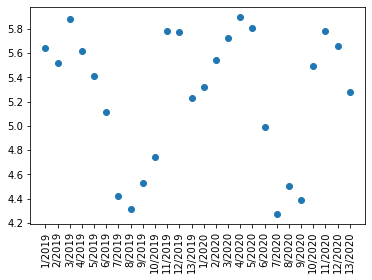

In [19]:
import matplotlib.pyplot as plt
plt.figure()
x = All_Sky_Irradiance[:,1]
ticks = []

for i in range(x.size):
    a = str(int(x[i])) + '/' + str(int(All_Sky_Irradiance[i,0]))
    ticks.append(a)
    # print(ticks[i])

y = All_Sky_Irradiance[:,2]
plt.scatter(ticks, y)
plt.xticks(ticks, ticks, rotation=90)
plt.show()

In [13]:
ticks


['1/2019',
 '2/2019',
 '3/2019',
 '4/2019',
 '5/2019',
 '6/2019',
 '7/2019',
 '8/2019',
 '9/2019',
 '10/2019',
 '11/2019',
 '12/2019',
 '13/2019',
 '1/2020',
 '2/2020',
 '3/2020',
 '4/2020',
 '5/2020',
 '6/2020',
 '7/2020',
 '8/2020',
 '9/2020',
 '10/2020',
 '11/2020',
 '12/2020',
 '13/2020']